In [4]:
#Manual Implementation by optimisers
import numpy as np
import matplotlib.pyplot as plt

def f(x): return (x - 3)**2 + 4
def grad_f(x): return 2 * (x - 3)

def optimize_manual(opt_type='sgd', lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8, steps=50):
    x = 0
    m, v = 0, 0
    path = [x]
    for t in range(1, steps+1):
        g = grad_f(x)
        if opt_type == 'sgd':
            x -= lr * g
        elif opt_type == 'rmsprop':
            v = beta2 * v + (1 - beta2) * g**2
            x -= lr * g / (np.sqrt(v) + eps)
        elif opt_type == 'adam':
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * g**2
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            x -= lr * m_hat / (np.sqrt(v_hat) + eps)
        path.append(x)
    return path


In [5]:
import torch

def optimize_torch(opt_class, lr=0.1, steps=50):
    x = torch.tensor([0.0], requires_grad=True)
    optimizer = opt_class([x], lr=lr)
    path = [x.item()]

    for _ in range(steps):
        loss = (x - 3) ** 2 + 4
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        path.append(x.item())
    return path


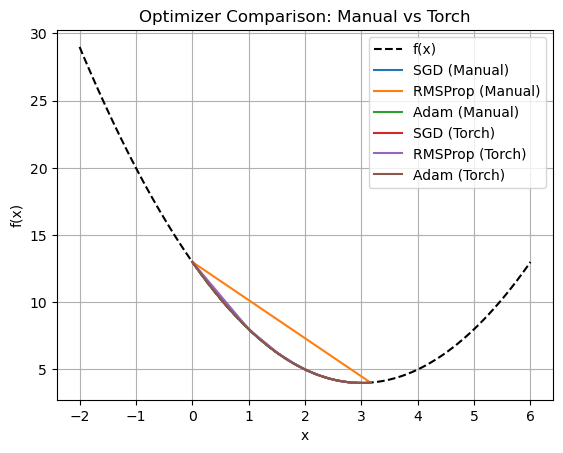

In [6]:
optimizers_manual = {
    "SGD (Manual)": optimize_manual('sgd'),
    "RMSProp (Manual)": optimize_manual('rmsprop'),
    "Adam (Manual)": optimize_manual('adam')
}

optimizers_torch = {
    "SGD (Torch)": optimize_torch(torch.optim.SGD),
    "RMSProp (Torch)": optimize_torch(torch.optim.RMSprop),
    "Adam (Torch)": optimize_torch(torch.optim.Adam)
}

# Plot all
x_vals = np.linspace(-2, 6, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, 'k--', label='f(x)')
for name, path in {**optimizers_manual, **optimizers_torch}.items():
    plt.plot(path, [f(x) for x in path], label=name)

plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Optimizer Comparison: Manual vs Torch')
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd

summary = pd.DataFrame({
    'Optimizer': list(optimizers_manual.keys()) + list(optimizers_torch.keys()),
    'Final x': [round(p[-1], 4) for p in list(optimizers_manual.values()) + list(optimizers_torch.values())],
    'Final f(x)': [round(f(p[-1]), 4) for p in list(optimizers_manual.values()) + list(optimizers_torch.values())]
})

summary


,Optimizer,Final x,Final f(x)
0,SGD (Manual),3.0000,4.0000
1,RMSProp (Manual),3.0000,4.0000
2,Adam (Manual),3.1689,4.0285
3,SGD (Torch),3.0000,4.0000
4,RMSProp (Torch),3.0000,4.0000
5,Adam (Torch),3.1689,4.0285
